In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier

In [2]:
def read_file(filename):
    df = pd.read_csv(filename)
    print(df.shape)
    df['Label'] = df['Label'].apply(lambda x: x.strip().lower())
    return df

In [4]:
# training csv is 90% of 18000 dataset model 1 - transformed
# testing csv is 10% of 18000 dataset model 1 - transformed

FILE_HO_TRAIN = 'training.csv'
FILE_HO_TEST = 'testingv02.csv'

df_ho_train = read_file(FILE_HO_TRAIN)
df_ho_test = read_file(FILE_HO_TEST)

(14400, 7)
(1890, 7)


In [5]:
from sklearn.preprocessing import LabelEncoder

target_encoder = LabelEncoder()
df_ho_train['Target'] = target_encoder.fit_transform(df_ho_train['Label'])
df_ho_test['Target'] = target_encoder.transform(df_ho_test['Label'])

x_ho_train = df_ho_train.drop(['Label', 'Target'], axis=1)
y_ho_train = df_ho_train['Target']

x_ho_test = df_ho_test.drop(['Label', 'Target'], axis=1)
y_ho_test = df_ho_test['Target']

In [6]:
# do like rapidminer setting
# criterion entropy is information gain
# estimator set 100
# max depth 10

modelRF = RandomForestClassifier(criterion="entropy", n_estimators=100, max_depth=10)
modelRF.fit(x_ho_train,y_ho_train)
modelRF.score(x_ho_test,y_ho_test)

0.9989417989417989

In [7]:
from sklearn.metrics import accuracy_score, f1_score

predicted= modelRF.predict(x_ho_test)

accuracy_ho = accuracy_score(predicted, y_ho_test) * 100
print('Akurasi pada Algoritma RandomForest menggunakan split dengan persentase 90:10 = %s' % accuracy_ho)

Akurasi pada Algoritma RandomForest menggunakan split dengan persentase 90:10 = 99.89417989417989


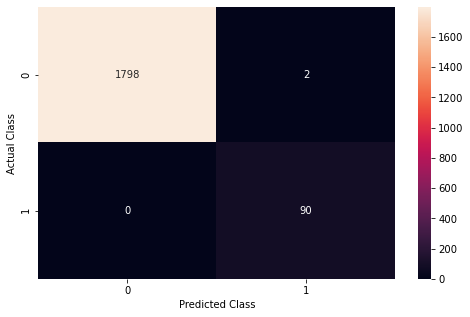

In [8]:
# Create Confusion Matrix

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
confusion_matrix(y_ho_test, predicted) 

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_ho_test, predicted), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

In [9]:
# Performance Matrix Report - Precision Recall f1score

from sklearn.metrics import classification_report
print (classification_report(y_ho_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1800
           1       0.98      1.00      0.99        90

    accuracy                           1.00      1890
   macro avg       0.99      1.00      0.99      1890
weighted avg       1.00      1.00      1.00      1890

